# Ford GoBike System Data
## by Abdullah Adel El damanhoury

## Investigation Overview

> There are 183412 trips in the dataset with 16 features (duration_sec , start_time , end_time , start_station_id , start_station_name , start_station_latitude , start_station_longitude , end_station_id , end_station_name , end_station_latitude , end_station_longitude , bike_id , user_type , member_birth_year , member_gender , bike_share_for_all_trip)

## Dataset Overview

> This dataset includes 183412 trips includes information about individual rides with 18 features(age and Day columns aer created) such as locations, time, and user attributes .

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
bike_df= pd.read_csv('201902-fordgobike-tripdata.csv')

#bike_df = bike_df[~bike_df.member_birth_year.isna()]
bike_df.start_time = bike_df.start_time.apply(pd.to_datetime)

bike_df['Day'] = bike_df['start_time'].dt.weekday_name
bike_df['age'] = bike_df['member_birth_year'].apply(lambda n: 2021 - n)


print(bike_df.shape)

(183412, 18)


## (Visualization 1)

### Distribution of duration in seconds
> This distribution is right-skewed such that the lower duration the more trips .

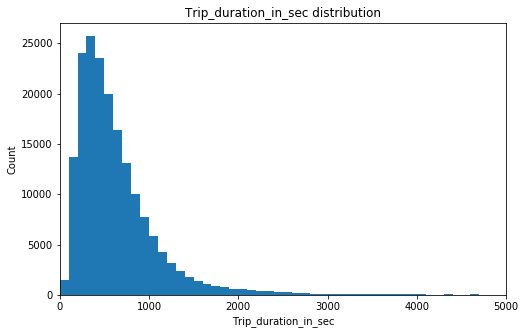

In [16]:
# Duration_sec distribution
binsize = 100
bins = np.arange(0, bike_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xlim(0, 5000)

plt.xlabel('Trip_duration_in_sec')
plt.ylabel('Count')
plt.title('Trip_duration_in_sec distribution')
plt.show()

## (Visualization 2)
### Correlation between 'duration_sec' and 'age'

> What is correlation between 'duration_sec' and 'age' columns ?

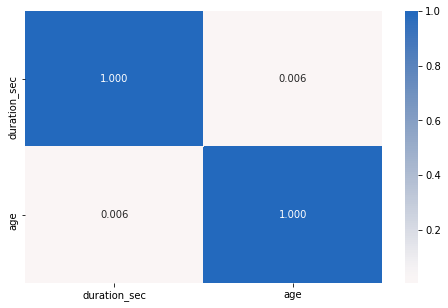

In [17]:
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['Day', 'member_gender', 'user_type']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

> Although there is slightly positive correlation between age and duration but it doesn't mean any thing . As a result i will consider that there is no any positive relationship

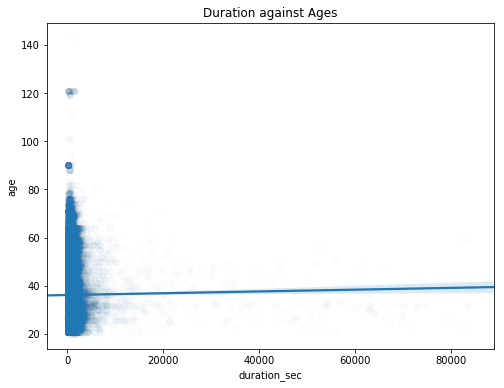

In [18]:
plt.figure(figsize = [8, 6])
sb.regplot(data = bike_df, x = 'duration_sec', y = 'age', scatter_kws={'alpha':0.01});
plt.title('Duration against Ages')
plt.show()


## (Visualization 3)
### Finding out Trip duration_sec vs Day vs member_gender
> We can notice that the females have more trips the whole week days than males while males have very much more duration .


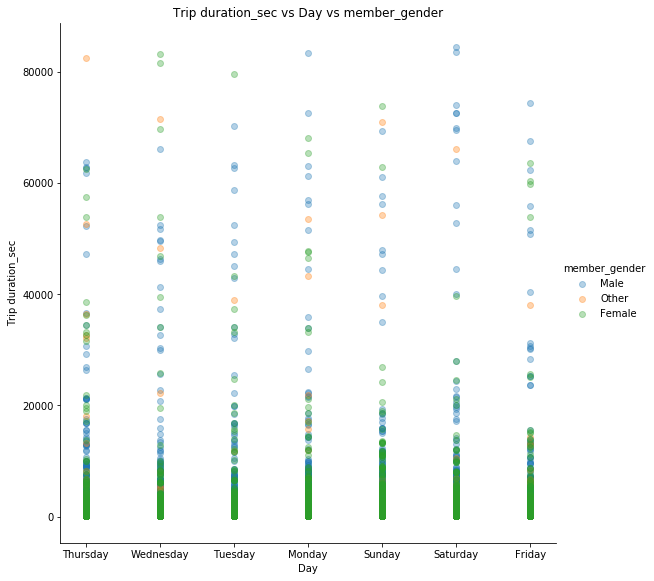

In [19]:
g = sb.FacetGrid(data =  bike_df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'Day','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip duration_sec vs Day vs member_gender')
plt.xlabel('Day')
plt.ylabel('Trip duration_sec');